In [1]:
import torch
import random
import numpy as np

In [2]:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [3]:
import torchvision.datasets

In [4]:
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [5]:
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:52: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [6]:
len(y_train), len(y_test)

(60000, 10000)

In [7]:
import matplotlib.pyplot as plt

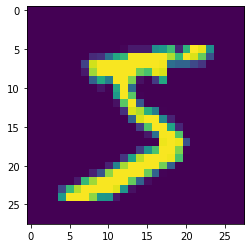

tensor(5)


In [8]:
plt.imshow(X_train[0, :, :])
plt.show()
print(y_train[0])

In [9]:
X_train.shape

torch.Size([60000, 28, 28])

In [10]:
X_train = X_train.unsqueeze(1).float()
X_test = X_test.unsqueeze(1).float()

In [11]:
X_train.shape

torch.Size([60000, 1, 28, 28])

In [12]:
class LeNet5(torch.nn.Module):
  def __init__(self,
               activation='tanh',
               pooling='avg',
               conv_size=5,
               use_batch_norn=False):
    super(LeNet5, self).__init__()

    self.conv_size = conv_size
    self.use_batch_norn = use_batch_norn

    if activation == 'tanh':
      activation_function = torch.nn.Tanh()
    elif activation == 'relu':
      activation_function = torch.nn.ReLU()
    else:
      raise NotImplementedError

    if pooling == 'avg':
      pooling_layer = torch.nn.AvgPool2d(kernel_size=2, stride=2)
    elif pooling == 'max':
      pooling_layer = torch.nn.MaxPool2d(kernel_size=2, stride=2)
    else:
      raise NotImplementedError

    if conv_size == 5:
      self.conv1 = torch.nn.Conv2d(in_channels=1,
                                   out_channels=6,
                                   kernel_size=5,
                                   padding=2)
    elif conv_size == 3:
      self.conv1_1 = torch.nn.Conv2d(in_channels=1,
                                   out_channels=6,
                                   kernel_size=3,
                                   padding=1)
      self.conv1_2 = torch.nn.Conv2d(in_channels=6,
                                   out_channels=6,
                                   kernel_size=3,
                                   padding=1)
    else:
      raise NotImplementedError
    
    self.act1 = activation_function
    self.bn1 = torch.nn.BatchNorm2d(num_features=6)
    self.pool1 = pooling_layer

    if conv_size == 5:
      self.conv2 = torch.nn.Conv2d(in_channels=6,
                                   out_channels=16,
                                   kernel_size=5,
                                   padding=0)
    elif conv_size == 3:
      self.conv2_1 = torch.nn.Conv2d(in_channels=6,
                                   out_channels=16,
                                   kernel_size=3,
                                   padding=0)
      self.conv2_2 = torch.nn.Conv2d(in_channels=16,
                                   out_channels=16,
                                   kernel_size=3,
                                   padding=0)
    else:
      raise NotImplementedError

    self.act2 = activation_function
    self.bn2 = torch.nn.BatchNorm2d(num_features=16)
    self.pool2 = pooling_layer

    self.fc1 = torch.nn.Linear(5 * 5 * 16, 120)
    self.act3 = activation_function

    self.fc2 = torch.nn.Linear(120, 84)
    self.act4 = activation_function

    self.fc3 = torch.nn.Linear(84, 10)

  def forward(self, x):
    if self.conv_size == 5:
      x = self.conv1(x)
    elif self.conv_size == 3:
      x = self.conv1_2(self.conv1_1(x))
    x = self.act1(x)
    if self.use_batch_norn:
      x = self.bn1(x)
    x = self.pool1(x)

    if self.conv_size == 5:
      x = self.conv2(x)
    elif self.conv_size == 3:
      x = self.conv2_2(self.conv2_1(x))
    x = self.act2(x)
    if self.use_batch_norn:
      x = self.bn2(x)
    x = self.pool2(x)

    x = x.view(x.size(0),x.size(1) * x.size(2) * x.size(3))
    x = self.fc1(x)
    x = self.act3(x)
    x = self.fc2(x)
    x = self.act4(x)
    x = self.fc3(x)

    return x

In [15]:
def train(net, X_train, y_train, X_test, y_test):
  device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
  net = net.to(device)
  loss = torch.nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(net.parameters(), lr=1.0e-3)

  batch_size = 100

  test_accuracy_history = []
  test_loss_history = []

  X_test = X_test.to(device)
  y_test = y_test.to(device)

  for epoch in range(30):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
      optimizer.zero_grad()
      net.train()

      batch_indexes = order[start_index : start_index + batch_size]

      X_batch = X_train[batch_indexes].to(device)
      y_batch = y_train[batch_indexes].to(device)

      preds = net.forward(X_batch)

      loss_value = loss(preds, y_batch)
      loss_value.backward()

      optimizer.step()

    net.eval()
    test_preds = net.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test).data.cpu())

    accuracy = (test_preds.argmax(dim=1)== y_test).float().mean().data.cpu()
    test_accuracy_history.append(accuracy)

    print(accuracy)
  print('-------------')
  return test_accuracy_history, test_loss_history

accuracies = {}
losses = {}


accuracies['tanh'], losses['tanh'] = \
  train(LeNet5(activation='tanh', conv_size=5),
        X_train, y_train, X_test, y_test)
  
accuracies['relu'], losses['relu'] = \
  train(LeNet5(activation='relu', conv_size=5),
        X_train, y_train, X_test, y_test)
  
accuracies['relu_3'], losses['relu_3'] = \
  train(LeNet5(activation='relu', conv_size=3),
        X_train, y_train, X_test, y_test)

accuracies['relu_3_max_pool'], losses['relu_3_max_pool'] = \
  train(LeNet5(activation='relu', conv_size=3, pooling='max'),
        X_train, y_train, X_test, y_test)

accuracies['relu_3_max_pool_bn'], losses['relu_3_max_pool_bn'] = \
  train(LeNet5(activation='relu', conv_size=3, pooling='max', use_batch_norn=True),
        X_train, y_train, X_test, y_test)

tensor(0.9709)
tensor(0.9840)
tensor(0.9868)
tensor(0.9859)
tensor(0.9859)
tensor(0.9892)
tensor(0.9883)
tensor(0.9871)
tensor(0.9862)
tensor(0.9847)
tensor(0.9884)
tensor(0.9891)
tensor(0.9889)
tensor(0.9896)
tensor(0.9891)
tensor(0.9876)
tensor(0.9885)
tensor(0.9889)
tensor(0.9902)
tensor(0.9895)
tensor(0.9895)
tensor(0.9896)
tensor(0.9876)
tensor(0.9878)
tensor(0.9880)
tensor(0.9869)
tensor(0.9860)
tensor(0.9863)
tensor(0.9887)
tensor(0.9876)
-------------
tensor(0.9816)
tensor(0.9861)
tensor(0.9877)
tensor(0.9882)
tensor(0.9902)
tensor(0.9899)
tensor(0.9883)
tensor(0.9868)
tensor(0.9896)
tensor(0.9912)
tensor(0.9875)
tensor(0.9879)
tensor(0.9884)
tensor(0.9904)
tensor(0.9865)
tensor(0.9887)
tensor(0.9905)
tensor(0.9905)
tensor(0.9893)
tensor(0.9902)
tensor(0.9893)
tensor(0.9893)
tensor(0.9893)
tensor(0.9898)
tensor(0.9885)
tensor(0.9893)
tensor(0.9906)
tensor(0.9890)
tensor(0.9925)
tensor(0.9924)
-------------
tensor(0.9851)
tensor(0.9839)
tensor(0.9858)
tensor(0.9894)
tensor(0.988

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


tensor(0.9839)
tensor(0.9880)
tensor(0.9871)
tensor(0.9848)
tensor(0.9889)
tensor(0.9878)
tensor(0.9836)
tensor(0.9891)
tensor(0.9891)
tensor(0.9875)
tensor(0.9877)
tensor(0.9889)
tensor(0.9877)
tensor(0.9871)
tensor(0.9906)
tensor(0.9906)
tensor(0.9876)
tensor(0.9888)
tensor(0.9885)
tensor(0.9888)
tensor(0.9886)
tensor(0.9891)
tensor(0.9883)
tensor(0.9900)
tensor(0.9904)
tensor(0.9897)
tensor(0.9896)
tensor(0.9903)
tensor(0.9910)
tensor(0.9893)
-------------
tensor(0.9784)
tensor(0.9869)
tensor(0.9883)
tensor(0.9811)
tensor(0.9838)
tensor(0.9876)
tensor(0.9910)
tensor(0.9899)
tensor(0.9882)
tensor(0.9895)
tensor(0.9909)
tensor(0.9910)
tensor(0.9880)
tensor(0.9913)
tensor(0.9900)
tensor(0.9909)
tensor(0.9910)
tensor(0.9884)
tensor(0.9914)
tensor(0.9919)
tensor(0.9908)
tensor(0.9917)
tensor(0.9913)
tensor(0.9915)
tensor(0.9915)
tensor(0.9889)
tensor(0.9906)
tensor(0.9926)
tensor(0.9922)
tensor(0.9906)
-------------


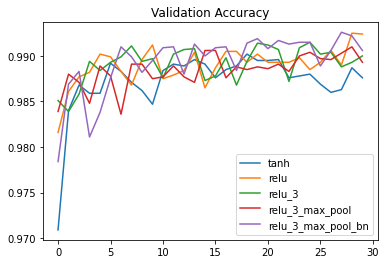

In [16]:
for experiment_id in accuracies.keys():
  plt.plot(accuracies[experiment_id], label=experiment_id)
plt.legend()
plt.title('Validation Accuracy');

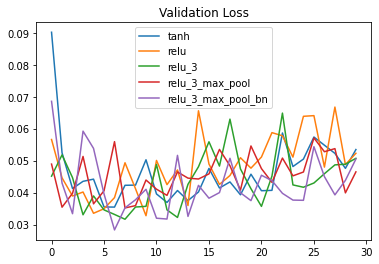

In [17]:
for experiment_id in losses.keys():
  plt.plot(losses[experiment_id], label=experiment_id)
plt.legend()
plt.title('Validation Loss');